# Continuité Uniforme et Applications au Deep Learning
## Illustrations et Applications Pratiques

Ce notebook illustre les concepts de continuité uniforme, fonctions lipschitziennes, et leurs applications au machine learning (fonctions de perte et d'activation).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.special import expit  # sigmoid
import warnings
warnings.filterwarnings('ignore')

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

np.random.seed(42)

## 1. Continuité Uniforme vs Continuité Simple

In [2]:
print("=== Continuité Uniforme ===")
print("\nDéfinition :")
print("  f est UNIFORMÉMENT continue si :")
print("  ∀ε > 0, ∃δ > 0, ∀x,y ∈ X : |x-y| < δ ⟹ |f(x)-f(y)| < ε")
print("\nDifférence avec la continuité simple :")
print("  • Continuité simple : δ dépend de ε ET du point x₀")
print("  • Continuité UNIFORME : δ dépend UNIQUEMENT de ε (même δ pour tous les points)")

# Exemple 1.14 : Continue mais PAS uniformément continue
def f_non_uniforme(x):
    """f(x) = x² sur ℝ : continue mais pas uniformément continue"""
    return x**2

# Exemple 1.15 : Uniformément continue
def f_uniforme(x):
    """f(x) = x² sur [0,1] : uniformément continue (compact)"""
    return x**2

print("\n=== Exemple 1.14 : f(x) = x² sur ℝ ===")
print("\nf est CONTINUE partout, mais PAS uniformément continue")
print("\nPreuve : Pour x grand, la pente f'(x) = 2x devient arbitrairement grande")
print("On peut toujours trouver x et y proches tels que |f(x) - f(y)| > ε")

# Démonstration numérique
epsilon = 1.0
x_values = [1, 10, 100, 1000]
delta = 0.1

print(f"\nTest avec ε = {epsilon}, δ = {delta} :")
print(f"\n{'x':>8} {'y=x+δ':>10} {'|f(x)-f(y)|':>15} {'< ε ?':>10}")
print("-" * 50)
for x in x_values:
    y = x + delta
    diff = abs(f_non_uniforme(x) - f_non_uniforme(y))
    check = "✓" if diff < epsilon else "✗"
    print(f"{x:8.0f} {y:10.1f} {diff:15.2f} {check:>10}")

print(f"\nConclusion : Pour x grand, même avec δ = {delta}, |f(x)-f(y)| > {epsilon}")
print("Donc f(x) = x² n'est PAS uniformément continue sur ℝ")

print("\n=== Exemple 1.15 : f(x) = x² sur [0,1] ===")
print("\nSur un intervalle COMPACT [0,1], f est uniformément continue")
print("(Théorème de Heine)")

# Sur [0,1], la dérivée max est f'(1) = 2
print("\nPour ε > 0, on peut choisir δ = ε/2 :")
print("Si |x - y| < δ, alors |x² - y²| = |x+y||x-y| ≤ 2|x-y| < 2δ = ε")

=== Continuité Uniforme ===

Définition :
  f est UNIFORMÉMENT continue si :
  ∀ε > 0, ∃δ > 0, ∀x,y ∈ X : |x-y| < δ ⟹ |f(x)-f(y)| < ε

Différence avec la continuité simple :
  • Continuité simple : δ dépend de ε ET du point x₀
  • Continuité UNIFORME : δ dépend UNIQUEMENT de ε (même δ pour tous les points)

=== Exemple 1.14 : f(x) = x² sur ℝ ===

f est CONTINUE partout, mais PAS uniformément continue

Preuve : Pour x grand, la pente f'(x) = 2x devient arbitrairement grande
On peut toujours trouver x et y proches tels que |f(x) - f(y)| > ε

Test avec ε = 1.0, δ = 0.1 :

       x      y=x+δ     |f(x)-f(y)|      < ε ?
--------------------------------------------------
       1        1.1            0.21          ✓
      10       10.1            2.01          ✗
     100      100.1           20.01          ✗
    1000     1000.1          200.01          ✗

Conclusion : Pour x grand, même avec δ = 0.1, |f(x)-f(y)| > 1.0
Donc f(x) = x² n'est PAS uniformément continue sur ℝ

=== Exemple 1.15 : 

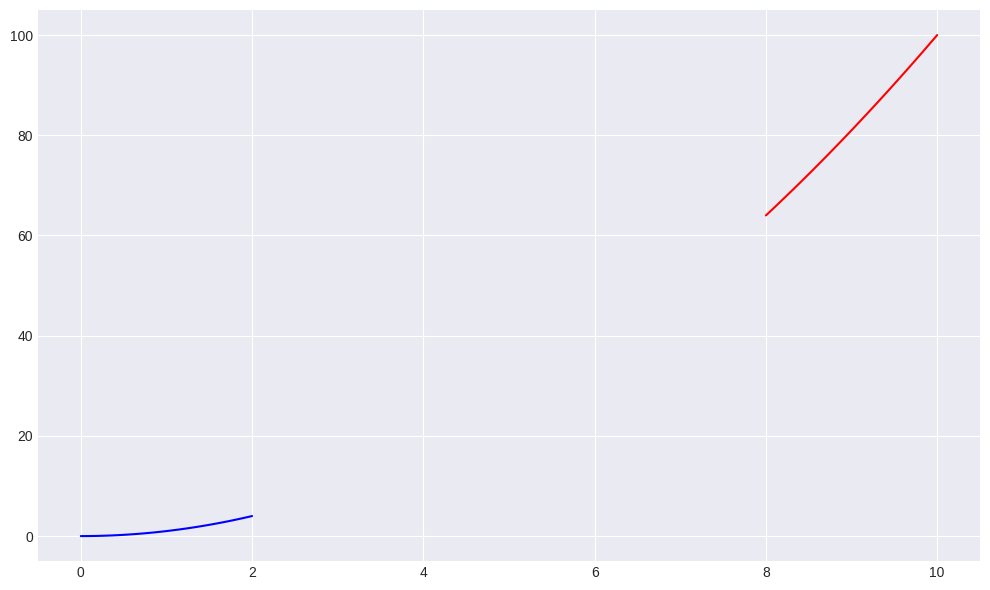

In [12]:
# Visualisation de la continuité uniforme
fig, (ax1) = plt.subplots(1, figsize=(10, 6))
# Graphique 1: f(x) = x² sur ℝ (zoom sur différentes régions)
x1 = np.linspace(0, 2, 100)
x2 = np.linspace(8, 10, 100)
# TODO: Définir f_non_uniforme(x) = x²
f_non_uniforme = lambda x: x**2
# TODO: Tracer la fonction sur les deux régions
ax1.plot(x1, f_non_uniforme(x1), label='f(x)=x² sur [0.2]', color='blue')
ax1.plot(x2, f_non_uniforme(x2), label='f(x)=x² sur [8,10]', color='red')
plt.tight_layout()
plt.show()

## 2. Continuité Lipschitzienne

In [13]:
print("=== Continuité Lipschitzienne ===")
print("\nDéfinition :")
print("  f est L-Lipschitzienne si :")
print("  |f(x) - f(y)| ≤ L·|x - y| pour tous x, y")
print("  |f(x) - f(y)| /|x-y| ≤ L pour tous x, y")
print("\nHiérarchie :")
print("  Lipschitz ⟹ Uniformément continue ⟹ Continue")
print("  (Les réciproques sont FAUSSES en général)")

# Fonctions d'exemple
def identite(x):
    return x

def sinus(x):
    return np.sin(x)

def racine(x):
    return np.sqrt(np.maximum(x, 0))

def carre_compact(x):
    return x**2

print("\n=== Exemple 1.16 : Exemples de fonctions ===")
print("\n1. f(x) = x (identité)")
print("   |f(x) - f(y)| = |x - y|")
print("   → 1-Lipschitz (L = 1)")

print("\n2. f(x) = sin(x)")
print("   |sin(x) - sin(y)| ≤ |x - y| (car |cos(z)| ≤ 1)")
print("   → 1-Lipschitz (L = 1)")

print("\n3. f(x) = √x sur [0, ∞)")
print("   PAS Lipschitz (dérivée infinie en 0)")
print("   f'(x) = 1/(2√x) → ∞ quand x → 0⁺")

print("\n4. f(x) = x² sur [0,1]")
print("   |f'(x)| = |2x| ≤ 2 sur [0,1]")
print("   → 2-Lipschitz (L = 2)")

# Vérification numérique de la constante de Lipschitz
def constante_lipschitz_empirique(f, x_min, x_max, n_points=1000):
    """Estime la constante de Lipschitz empiriquement"""
    x = np.linspace(x_min, x_max, n_points)
    y = f(x)

    # Calculer toutes les pentes
    ratios = []
    for i in range(len(x)):
        for j in range(i+1, min(i+50, len(x))):  # Limiter pour la performance
            if x[j] != x[i]:
                ratio = abs(y[j] - y[i]) / abs(x[j] - x[i])
                ratios.append(ratio)

    return max(ratios) if ratios else 0

print("\n=== Vérification Empirique ===")
print(f"\nConstante de Lipschitz empirique :")
print(f"  • f(x) = x      sur [0,10]  : L ≈ {constante_lipschitz_empirique(identite, 0, 10):.4f}")
print(f"  • f(x) = sin(x) sur [0,2π]  : L ≈ {constante_lipschitz_empirique(sinus, 0, 2*np.pi):.4f}")
print(f"  • f(x) = x²     sur [0,1]   : L ≈ {constante_lipschitz_empirique(carre_compact, 0, 1):.4f}")
print(f"  • f(x) = √x     sur [0.01,1]: L ≈ {constante_lipschitz_empirique(racine, 0.01, 1):.4f}")
print(f"  • f(x) = √x     sur [0,1]   : L ≈ {constante_lipschitz_empirique(racine, 1e-6, 1):.1f} (tend vers ∞!)")

=== Continuité Lipschitzienne ===

Définition :
  f est L-Lipschitzienne si :
  |f(x) - f(y)| ≤ L·|x - y| pour tous x, y
  |f(x) - f(y)| /|x-y| ≤ L pour tous x, y

Hiérarchie :
  Lipschitz ⟹ Uniformément continue ⟹ Continue
  (Les réciproques sont FAUSSES en général)

=== Exemple 1.16 : Exemples de fonctions ===

1. f(x) = x (identité)
   |f(x) - f(y)| = |x - y|
   → 1-Lipschitz (L = 1)

2. f(x) = sin(x)
   |sin(x) - sin(y)| ≤ |x - y| (car |cos(z)| ≤ 1)
   → 1-Lipschitz (L = 1)

3. f(x) = √x sur [0, ∞)
   PAS Lipschitz (dérivée infinie en 0)
   f'(x) = 1/(2√x) → ∞ quand x → 0⁺

4. f(x) = x² sur [0,1]
   |f'(x)| = |2x| ≤ 2 sur [0,1]
   → 2-Lipschitz (L = 2)

=== Vérification Empirique ===

Constante de Lipschitz empirique :
  • f(x) = x      sur [0,10]  : L ≈ 1.0000
  • f(x) = sin(x) sur [0,2π]  : L ≈ 1.0000
  • f(x) = x²     sur [0,1]   : L ≈ 1.9990
  • f(x) = √x     sur [0.01,1]: L ≈ 4.8819
  • f(x) = √x     sur [0,1]   : L ≈ 30.6 (tend vers ∞!)


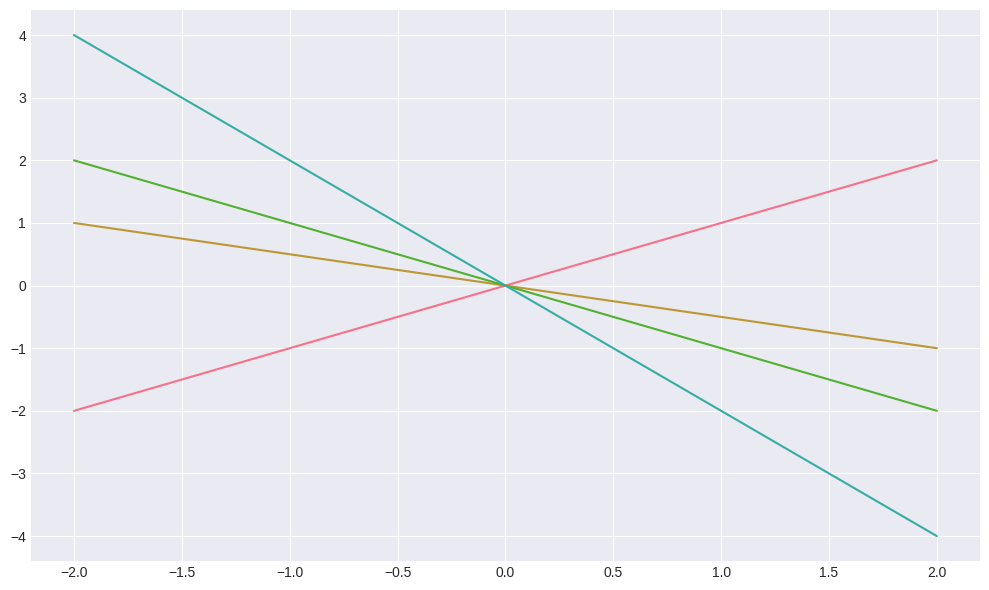

In [20]:
# Visualisation des fonctions lipschitziennes
fig, axes = plt.subplots(1, figsize=(10, 6))
# f(x) = x (1-Lipschitz)
x = np.linspace(-2, 2, 100)
# TODO: Définir identite(x) = x
identite = lambda x: x
# TODO: Tracer la fonction identité
axes.plot(x, identite(x), label='f(x)=x')
# TODO: Tracer les cônes de Lipschitz pour différentes valeurs de L x0, y0 = 0, 0
x0, y0 = 0, 0
for L in [0.5, 1, 2]:
  # axes[0, 0].plot(x, y0 + L*(x - x0), label=f'L={L}')
  axes.plot(x, y0 - L*(x - x0), label=f'L={L}')
  pass

plt.tight_layout()
plt.show()

## 3. Application 1.15 : Convergence de la Descente de Gradient

In [35]:
print("=== Application 1.15 : Convergence de la Descente de Gradient ===")
print("\nThéorème (simplifié) :")
print("  Si f est convexe et ∇f est L-Lipschitz,")
print("  alors la descente de gradient avec α = 1/L")
print("  converge vers le minimum à un taux O(1/k)")

# Fonction objectif (f(x) = x^2) et son gradient
def f_example(x):
    return x**2

def grad_f_example(x):
    return 2*x

# Implémenter la descente de gradient
def gradient_descent(f, grad_f, x0, alpha, n_iter):
    history = [x0]
    x = x0
    for _ in range(n_iter):
        gradient = grad_f(x)
        x = x - alpha * gradient
        history.append(x)
    return np.array(history)

# Exemple d'utilisation
x0 = 5.0 # Point de départ
n_iter = 100 # Nombre d'itérations

# Estimation de L pour f(x) = x²
# f'(x) = 2x. Pour cette fonction simple, L peut être le 2ème dérivé (2).
L_val = 2.0

alpha_optimal = 1 / L_val # Taux d'apprentissage optimal
alphas = {
    'optimal': alpha_optimal,
    'small': alpha_optimal / 5,
    'large': alpha_optimal * 1.5
}

print("\nLa constante L contrôle la vitesse de convergence")
print(f"  Pour f(x) = x², L = {L_val}")
print(f"  Taux d'apprentissage optimal α = 1/L = {alpha_optimal:.4f}")

historiques = {}
for name, alpha in alphas.items():
    print(f"  Exécution de la descente de gradient avec α = {alpha:.4f} ({name})...")
    historiques[name] = gradient_descent(f_example, grad_f_example, x0, alpha, n_iter)

print("Descente de gradient implémentée et exécutée pour différents taux d'apprentissage.")

=== Application 1.15 : Convergence de la Descente de Gradient ===

Théorème (simplifié) :
  Si f est convexe et ∇f est L-Lipschitz,
  alors la descente de gradient avec α = 1/L
  converge vers le minimum à un taux O(1/k)

La constante L contrôle la vitesse de convergence
  Pour f(x) = x², L = 2.0
  Taux d'apprentissage optimal α = 1/L = 0.5000
  Exécution de la descente de gradient avec α = 0.5000 (optimal)...
  Exécution de la descente de gradient avec α = 0.1000 (small)...
  Exécution de la descente de gradient avec α = 0.7500 (large)...
Descente de gradient implémentée et exécutée pour différents taux d'apprentissage.


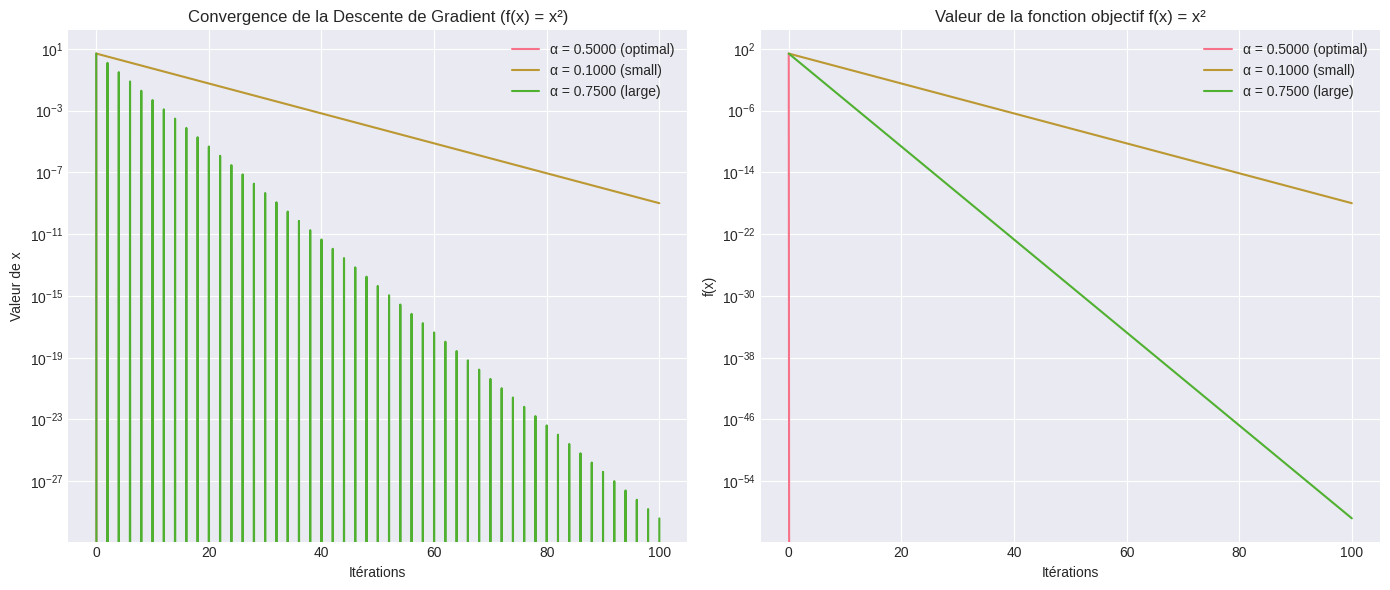

In [36]:
# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1: Trajectoires
# Tracer les trajectoires de convergence pour différents learning rates
for name, hist in historiques.items():
    ax1.plot(range(len(hist)), hist, label=f'α = {alphas[name]:.4f} ({name})')

ax1.set_title('Convergence de la Descente de Gradient (f(x) = x²)')
ax1.set_xlabel('Itérations')
ax1.set_ylabel('Valeur de x')
ax1.set_yscale('log') # Utile pour visualiser la convergence rapide vers 0
ax1.legend()
ax1.grid(True)

# Graphique 2: Comparaison des vitesses
# Comparer les vitesses de convergence
for name, hist in historiques.items():
    ax2.plot(range(len(hist)), [f_example(x) for x in hist], label=f'α = {alphas[name]:.4f} ({name})')

ax2.set_title('Valeur de la fonction objectif f(x) = x²')
ax2.set_xlabel('Itérations')
ax2.set_ylabel('f(x)')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## 4. Fonctions de Perte en Machine Learning

In [37]:
print("=== Fonctions de Perte en Machine Learning ===")
print("\nLa fonction de perte L(θ) mesure l'erreur du modèle")
print("\nPropriétés souhaitables :")
print("  • CONTINUITÉ : petites variations θ → petites variations L")
print("  • DIFFÉRENTIABILITÉ : pour optimiser par gradient")
print("  • CONVEXITÉ : garantit unique minimum global")

# Définir les fonctions de perte
def mse_loss(y_true, y_pred):
    """Mean Squared Error"""
    return np.mean((y_true - y_pred)**2)

def cross_entropy_loss(y_true, p_pred):
    """Binary Cross-Entropy"""
    epsilon = 1e-15
    p_pred = np.clip(p_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(p_pred) + (1 - y_true) * np.log(1 - p_pred))

def hinge_loss(y_true, y_pred):
    """Hinge Loss (SVM) - y_true ∈ {-1, 1}"""
    return np.mean(np.maximum(0, 1 - y_true * y_pred))

def mae_loss(y_true, y_pred):
    """Mean Absolute Error"""
    return np.mean(np.abs(y_true - y_pred))

print("\n=== Exemple 1.17 : Mean Squared Error (MSE) ===")
print("\nL(θ) = (1/n)Σ(yᵢ - f_θ(xᵢ))²")
print("\nPropriétés :")
print("  ✓ Continue si f_θ continue en θ")
print("  ✓ Différentiable si f_θ différentiable")
print("  ✓ Convexe si f_θ affine en θ (régression linéaire)")

print("\n=== Exemple 1.18 : Cross-Entropy ===")
print("\nL(θ) = -(1/n)Σ[yᵢ log(p_θ(xᵢ)) + (1-yᵢ)log(1-p_θ(xᵢ))]")
print("\nPropriétés :")
print("  ✓ Continue pour p ∈ (0,1)")
print("  ✓ Différentiable")
print("  ✓ Convexe pour régression logistique")

print("\n=== Exemple 1.19 : Hinge Loss (SVM) ===")
print("\nL(θ) = (1/n)Σ max(0, 1 - yᵢ·θᵀxᵢ)")
print("\nPropriétés :")
print("  ✓ Continue partout")
print("  ✗ Non différentiable en θᵀxᵢ = yᵢ (mais sous-différentiable)")
print("  ✓ Convexe")

=== Fonctions de Perte en Machine Learning ===

La fonction de perte L(θ) mesure l'erreur du modèle

Propriétés souhaitables :
  • CONTINUITÉ : petites variations θ → petites variations L
  • DIFFÉRENTIABILITÉ : pour optimiser par gradient
  • CONVEXITÉ : garantit unique minimum global

=== Exemple 1.17 : Mean Squared Error (MSE) ===

L(θ) = (1/n)Σ(yᵢ - f_θ(xᵢ))²

Propriétés :
  ✓ Continue si f_θ continue en θ
  ✓ Différentiable si f_θ différentiable
  ✓ Convexe si f_θ affine en θ (régression linéaire)

=== Exemple 1.18 : Cross-Entropy ===

L(θ) = -(1/n)Σ[yᵢ log(p_θ(xᵢ)) + (1-yᵢ)log(1-p_θ(xᵢ))]

Propriétés :
  ✓ Continue pour p ∈ (0,1)
  ✓ Différentiable
  ✓ Convexe pour régression logistique

=== Exemple 1.19 : Hinge Loss (SVM) ===

L(θ) = (1/n)Σ max(0, 1 - yᵢ·θᵀxᵢ)

Propriétés :
  ✓ Continue partout
  ✗ Non différentiable en θᵀxᵢ = yᵢ (mais sous-différentiable)
  ✓ Convexe


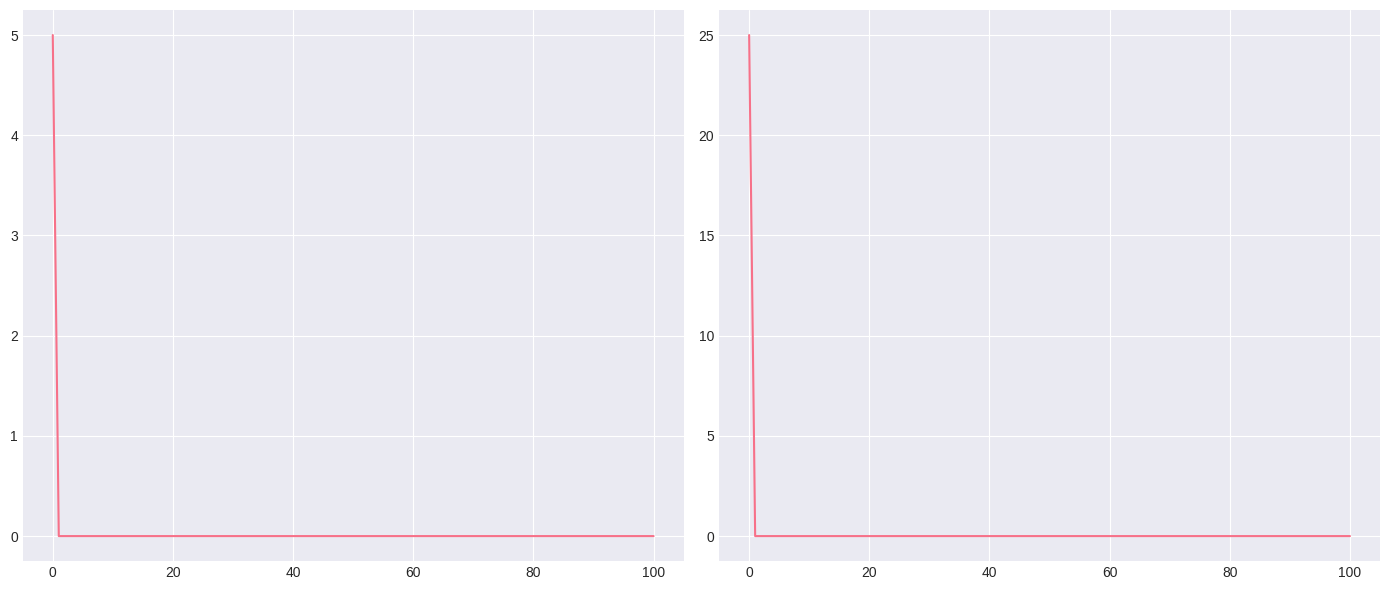

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [38]:
# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Graphique 1: Trajectoires
# TODO: Tracer les trajectoires de convergence pour différents learning rates
for name, hist in historiques.items():
  ax1.plot(range(len(hist)), hist, label=f'α = {alphas[name]:.4f} ({name})')
  # Graphique 2: Comparaison des vitesses
  # TODO: Comparer les vitesses de convergence
  ax2.plot(range(len(hist)), [f_example(x) for x in hist], label=f'α = {alphas[name]:.4f} ({name})')



  plt.tight_layout()
  plt.show()

## 5. Fonctions d'Activation

In [39]:
print("=== Fonctions d'Activation ===")
print("\nDans les réseaux de neurones, chaque neurone applique")
print("une fonction d'activation NON-LINÉAIRE")

# Définir les fonctions d'activation
def sigmoid(z):
    """Sigmoïde : σ(z) = 1/(1 + e^(-z))"""
    # TODO: Implémenter la fonction sigmoïde
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    """Dérivée : σ'(z) = σ(z)(1 - σ(z))"""
    # TODO: Implémenter la dérivée
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    """ReLU : max(0, z)"""
    # TODO: Implémenter ReLU
    return np.maximum(0, z)

def tanh(z):
    """Tangente hyperbolique"""
    # TODO: Implémenter tanh
    return np.tanh(z)

print("Fonctions d'activation définies")

=== Fonctions d'Activation ===

Dans les réseaux de neurones, chaque neurone applique
une fonction d'activation NON-LINÉAIRE
Fonctions d'activation définies


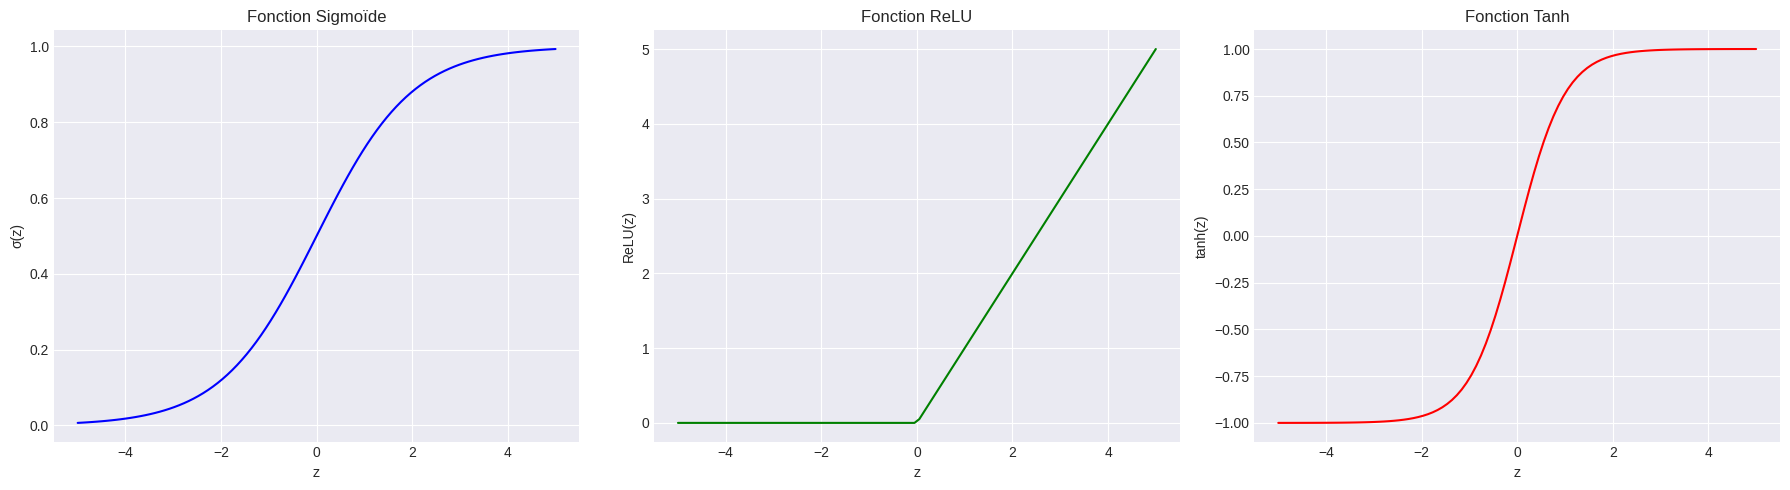

In [42]:
# Visualisation des fonctions d'activation
fig_activations, axes_activations = plt.subplots(1, 3, figsize=(18, 5))

z_values = np.linspace(-5, 5, 100)

# Sigmoïde
axes_activations[0].plot(z_values, sigmoid(z_values), label='Sigmoïde', color='blue')
axes_activations[0].set_title('Fonction Sigmoïde')
axes_activations[0].set_xlabel('z')
axes_activations[0].set_ylabel('σ(z)')
axes_activations[0].grid(True)

# ReLU
axes_activations[1].plot(z_values, relu(z_values), label='ReLU', color='green')
axes_activations[1].set_title('Fonction ReLU')
axes_activations[1].set_xlabel('z')
axes_activations[1].set_ylabel('ReLU(z)')
axes_activations[1].grid(True)

# Tanh
axes_activations[2].plot(z_values, tanh(z_values), label='Tanh', color='red')
axes_activations[2].set_title('Fonction Tanh')
axes_activations[2].set_xlabel('z')
axes_activations[2].set_ylabel('tanh(z)')
axes_activations[2].grid(True)

plt.tight_layout()
plt.show()

## 6. Théorème d'Approximation Universelle

=== Théorème d'Approximation Universelle ===

Théorème (Cybenko, 1989) :
  Un réseau de neurones à UNE couche cachée avec fonction
  d'activation sigmoïde peut approximer uniformément TOUTE
  fonction continue sur un compact, avec précision arbitraire


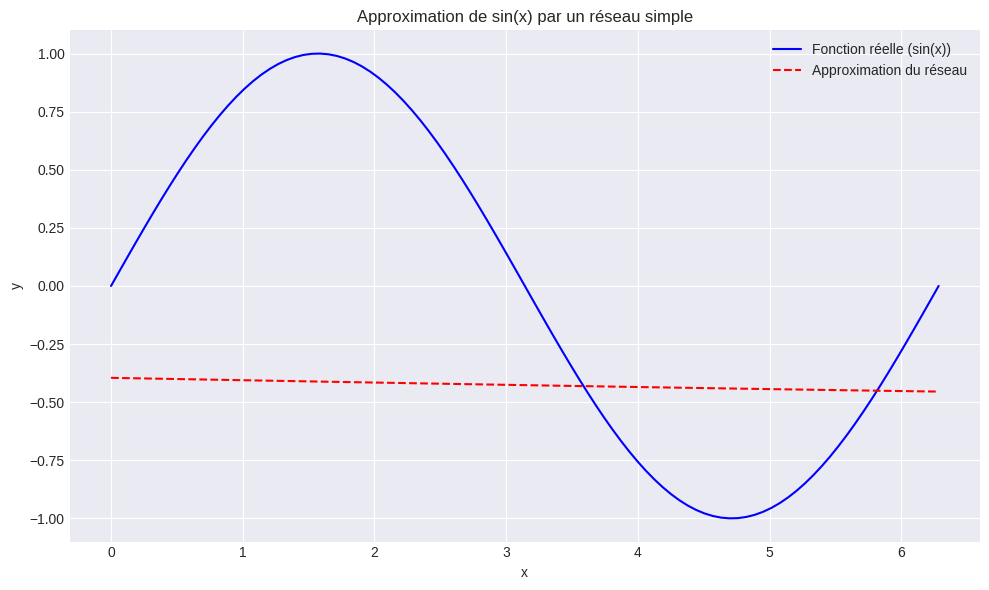


Ce théorème justifie l'utilisation des réseaux de neurones


In [41]:
print("=== Théorème d'Approximation Universelle ===")
print("\nThéorème (Cybenko, 1989) :")
print("  Un réseau de neurones à UNE couche cachée avec fonction")
print("  d'activation sigmoïde peut approximer uniformément TOUTE")
print("  fonction continue sur un compact, avec précision arbitraire")

# TODO: Créer un réseau simple pour approximer une fonction
# Créons un réseau simple à une couche cachée pour approximer une fonction sinus

def simple_network(x, weights_hidden, bias_hidden, weights_output, bias_output, activation_fn):
    # Couche cachée
    hidden_layer_input = np.dot(x, weights_hidden) + bias_hidden
    hidden_layer_output = activation_fn(hidden_layer_input)

    # Couche de sortie
    output = np.dot(hidden_layer_output, weights_output) + bias_output
    return output

# Exemple d'approximation de sin(x) sur [0, 2π]
np.random.seed(42)
x_data = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
y_true = np.sin(x_data)

# Paramètres du réseau (simplifiés pour l'exemple)
# 1 neurone d'entrée, 10 neurones cachés, 1 neurone de sortie
input_size = 1
hidden_size = 10
output_size = 1

# Initialisation aléatoire des poids et biais
weights_hidden = np.random.randn(input_size, hidden_size) * 0.1
bias_hidden = np.zeros((1, hidden_size))
weights_output = np.random.randn(hidden_size, output_size) * 0.1
bias_output = np.zeros((1, output_size))

# On utilise la sigmoïde comme fonction d'activation
activation_fn = sigmoid # sigmoid est définie dans une cellule précédente

# Calculer la sortie du réseau
y_pred = simple_network(x_data, weights_hidden, bias_hidden, weights_output, bias_output, activation_fn)

# Visualisation de l'approximation
fig_approx, ax_approx = plt.subplots(figsize=(10, 6))
ax_approx.plot(x_data, y_true, label='Fonction réelle (sin(x))', color='blue')
ax_approx.plot(x_data, y_pred, label='Approximation du réseau', color='red', linestyle='--')
ax_approx.set_title('Approximation de sin(x) par un réseau simple')
ax_approx.set_xlabel('x')
ax_approx.set_ylabel('y')
ax_approx.legend()
ax_approx.grid(True)
plt.tight_layout()
plt.show()

print("\nCe théorème justifie l'utilisation des réseaux de neurones")

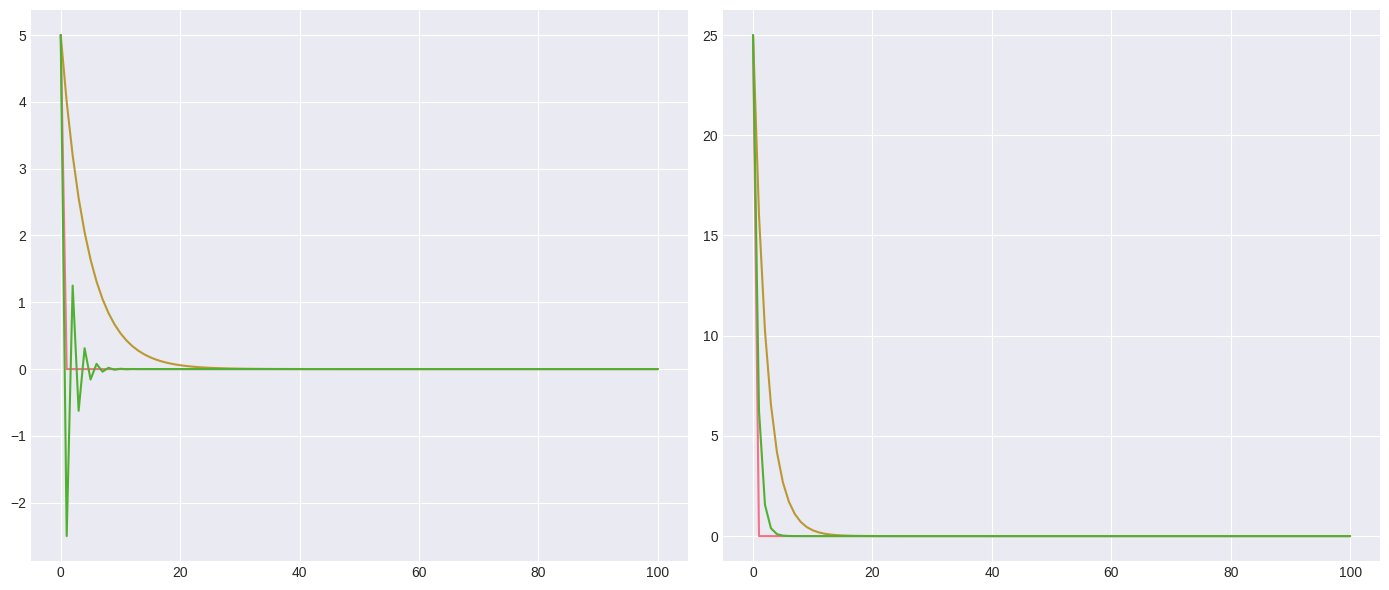

In [43]:
# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Graphique 1: Trajectoires
# TODO: Tracer les trajectoires de convergence pour différents learning rates
for name, hist in historiques.items():
  ax1.plot(range(len(hist)), hist, label=f'α = {alphas[name]:.4f} ({name})')

# Graphique 2: Comparaison des vitesses
# TODO: Comparer les vitesses de convergence
for name, hist in historiques.items():
  ax2.plot(range(len(hist)), [f_example(x) for x in hist], label=f'α = {alphas[name]:.4f} ({name})')

plt.tight_layout()
plt.show()

## 7. Convexité

In [44]:
print("=== Convexité ===")
print("\nDéfinition :")
print("  f est convexe si pour tous x, y et λ ∈ [0,1] :")
print("  f(λx + (1-λ)y) ≤ λf(x) + (1-λ)f(y)")
# TODO: Définir une fonction convexe
def f_convexe(x):
  # TODO: Implémenter f(x) = x²
  return x**2

# TODO: Définir une fonction non-convexe
def f_non_convexe(x):
  # TODO: Implémenter f(x) = -x² ou sin(x)
  return -x**2
  print("\nPropriété : toute fonction convexe a un unique minimum global")

=== Convexité ===

Définition :
  f est convexe si pour tous x, y et λ ∈ [0,1] :
  f(λx + (1-λ)y) ≤ λf(x) + (1-λ)f(y)


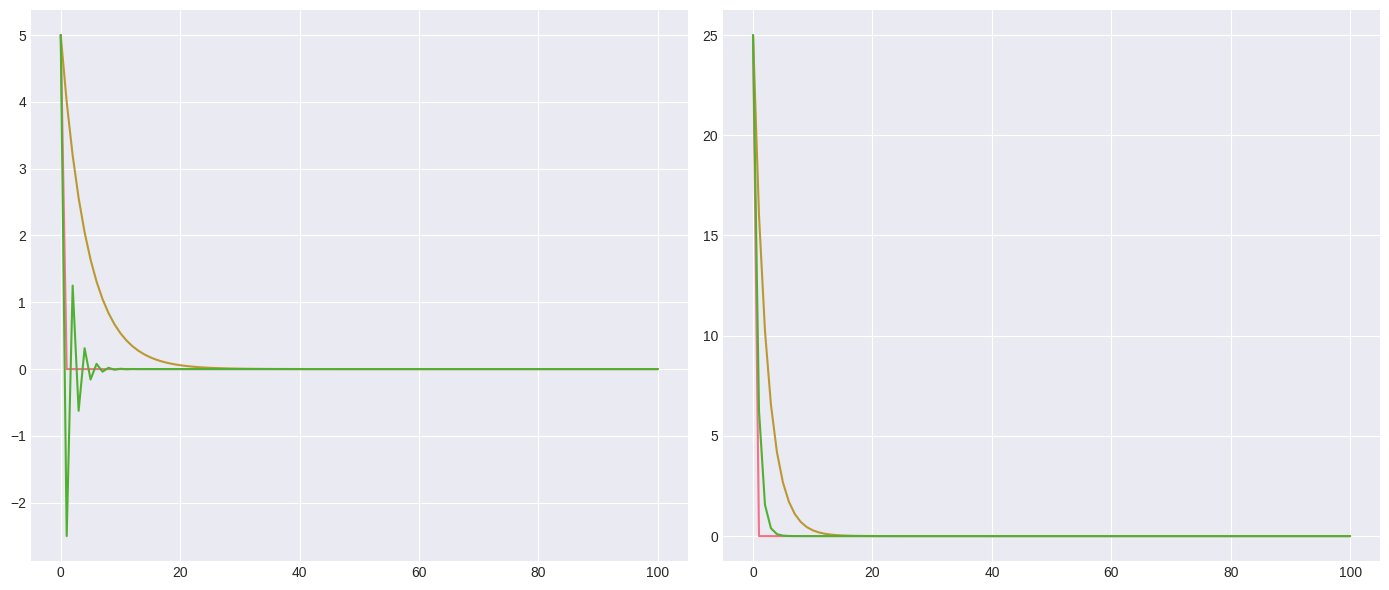

In [45]:
# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Graphique 1: Trajectoires
# TODO: Tracer les trajectoires de convergence pour différents learning rates
for name, hist in historiques.items():
  ax1.plot(range(len(hist)), hist, label=f'α = {alphas[name]:.4f} ({name})')

# Graphique 2: Comparaison des vitesses
# TODO: Comparer les vitesses de convergence
for name, hist in historiques.items():
  ax2.plot(range(len(hist)), [f_example(x) for x in hist], label=f'α = {alphas[name]:.4f} ({name})')
plt.tight_layout()
plt.show()

## 8. Synthèse Finale - Module Complet

In [47]:
print("="*80)
print("SYNTHÈSE COMPLÈTE : MODULE 1 - ANALYSE MATHÉMATIQUE POUR ML")
print("="*80)
# TODO: Résumer les concepts clés du module
print('1. Espaces métriques')
print('2. Espaces métriques')
print('3. Continuité uniforme et Lipschitz')
print("4. Fonctions de perte et d'activation")
print("5. Théorème d'approximation universelle")
print("6. Convexité et optimisation")

SYNTHÈSE COMPLÈTE : MODULE 1 - ANALYSE MATHÉMATIQUE POUR ML
1. Espaces métriques
2. Espaces métriques
3. Continuité uniforme et Lipschitz
4. Fonctions de perte et d'activation
5. Théorème d'approximation universelle
6. Convexité et optimisation
